> preprocess.py
* reads the images from the folders
* histogram equalization 1/0
* gamma correction 1/0
* saves the images and masks

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os, glob
from PIL import Image


In [2]:
data_path = 'PH2 Dataset images'

In [3]:
def hist_equ(img_path = '', show = False, img = None):
    if img is None:
        img = cv2.imread(data_path + img_path)

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # RGB to YUB color space

    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # histogram equalization in Y channel

    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # inverse transform
    
    if show:    
        comp = np.hstack((img,equ)) # horizontal stack
        cv2.imwrite('original.bmp',img)
        cv2.imwrite('hist_equ.bmp',equ)
        cv2.imwrite('comp.bmp',comp)
        plt.imshow(comp)
        plt.show()
    return equ


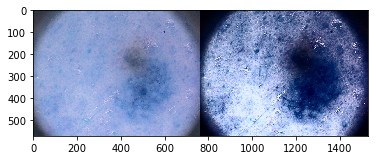

In [4]:
a = cv2.imread(os.path.join(data_path,'IMD006/IMD006_Dermoscopic_Image/IMD006.bmp'))
hist_eq_d = hist_equ(img = a, show = True)

In [5]:

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

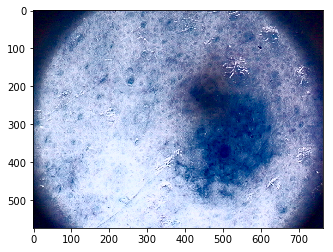

True

In [6]:
img = cv2.imread('hist_equ.bmp')
gimg = adjust_gamma(img, gamma = 1.55) ## 1.55 looks okay
plt.imshow(gimg)
plt.show()
cv2.imwrite('gamma_1.55.bmp',gimg)

In [7]:
# saving the images in class folders
def load_images(path='PH2 Dataset images'):
    for file_name in glob.glob(os.path.join(path,"**/**/*.bmp")):
        #print(file_name)
        pass

In [8]:
load_images()

In [16]:
# dummy pre-processing functions
def zero_pad(id):
    if(id<10):
        return '00' + str(id)
    elif(id<100):
        return '0' + str(id)
    else:
        return str(id)

In [15]:
def make_square(im, min_size=512, fill_color=(0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, ((size - x) // 2, (size - y) // 2))
    return new_im

In [17]:
def label_images(_id, flag_show, cnt, data_split): # just save the raw image and the mask
    _id = zero_pad(_id)
    path='PH2 Dataset images/'
    
    imgpath = path + 'IMD'+_id+'/IMD'+_id+'_Dermoscopic_Image/IMD'+_id+'.bmp'  
    maskpath = path + 'IMD'+_id+'/IMD'+_id+'_lesion/IMD'+_id+'_lesion.bmp'
    img = Image.open(imgpath)
    msk = Image.open(maskpath)
    
    #cv2.imshow('Main Image',img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #img = make_square(img)
    #msk = make_square(msk)
    
    if flag_show:
        plt.imshow(img)
        plt.show()
        #print(img.shape)

        plt.imshow(msk)
        plt.show()
        
    #print(img)
    #print(msk)


    #msk = msk/255 # normalizing
    #max_channels = np.amax([np.amax(msk[:,:,0]), np.amax(msk[:,:,1]), np.amax(msk[:,:,2])])
    
    #gen_img = img*msk
    
    directory = os.path.join('data_seg', data_split, 'image')
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    gen_img_name =  directory + '/' + str(cnt) + '.png'
    img.save(gen_img_name)
    
    directory2 = os.path.join('data_seg', data_split, 'label')
    if not os.path.exists(directory2):
        os.makedirs(directory2)
    mask_name =  directory2 + '/' + str(cnt) + '.png'
    msk.save(mask_name)
   

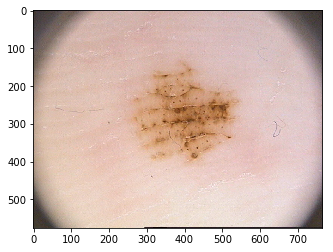

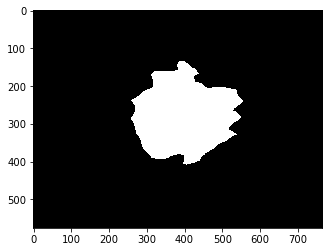

In [18]:
label_images(8,1,0,'train')

In [21]:
import pandas
df = pandas.read_excel('PH2_dataset.xlsx') # The excel file was modified, unnecessary info was removed
#print the column names
print (df.columns)
#get the values for a given column
values = df['Image Name'].values
#get a data frame with selected columns
FORMAT = ['Image Name', 'Common Nevus', 'Atypical Nevus', 'Melanoma']
df_selected = df[FORMAT]
print(df_selected.loc[0][0])
print(type(df_selected.loc[0][0]))
df_selected[1:4]

Index(['Image Name', 'Histological Diagnosis', 'Common Nevus',
       'Atypical Nevus', 'Melanoma', 'Asymmetry\n(0/1/2)',
       'Pigment Network\n(AT/T)', 'Dots/Globules\n(A/AT/T)', 'Streaks\n(A/P)',
       'Regression Areas\n(A/P)', 'Blue-Whitish Veil\n(A/P)', 'White', 'Red',
       'Light-Brown', 'Dark-Brown', 'Blue-Gray', 'Black'],
      dtype='object')
IMD003
<class 'str'>


,Image Name,Common Nevus,Atypical Nevus,Melanoma
1,IMD009,X,NaN,NaN
2,IMD016,X,NaN,NaN
3,IMD022,X,NaN,NaN


In [22]:
import random

In [26]:
num_img = 200
all_id = []
for r in range(num_img):
    id = int(df_selected.loc[r][0][-3:])
    #print(id)
    all_id.append(id)
print(all_id[:5])
random.seed(1997)
random.shuffle(all_id)
print(all_id[:5])

[3, 9, 16, 22, 24]
[421, 85, 80, 384, 38]


In [28]:
train_split = 0.85
ed = int(num_img*0.85)
train_id = all_id[:ed]
test_id = all_id[ed:]
print(train_id[-5:])
print(test_id[:5])
print(len(train_id))
print(len(test_id))

[251, 204, 406, 196, 50]
[432, 240, 413, 436, 380]
170
30


In [29]:
for ti in range(len(train_id)):
    label_images(train_id[ti],0,ti,'train')
for ti in range(len(test_id)):
    label_images(test_id[ti],0,ti,'test')

In [2]:
print(__name__)

__main__


In [16]:
if __name__ is not 'main': # importing from another file
    print('')
    

**Reference:**
 1. https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
 2. https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image
 3. https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black